In [1]:
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [3]:
adata = sq.datasets.visium_hne_adata()
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

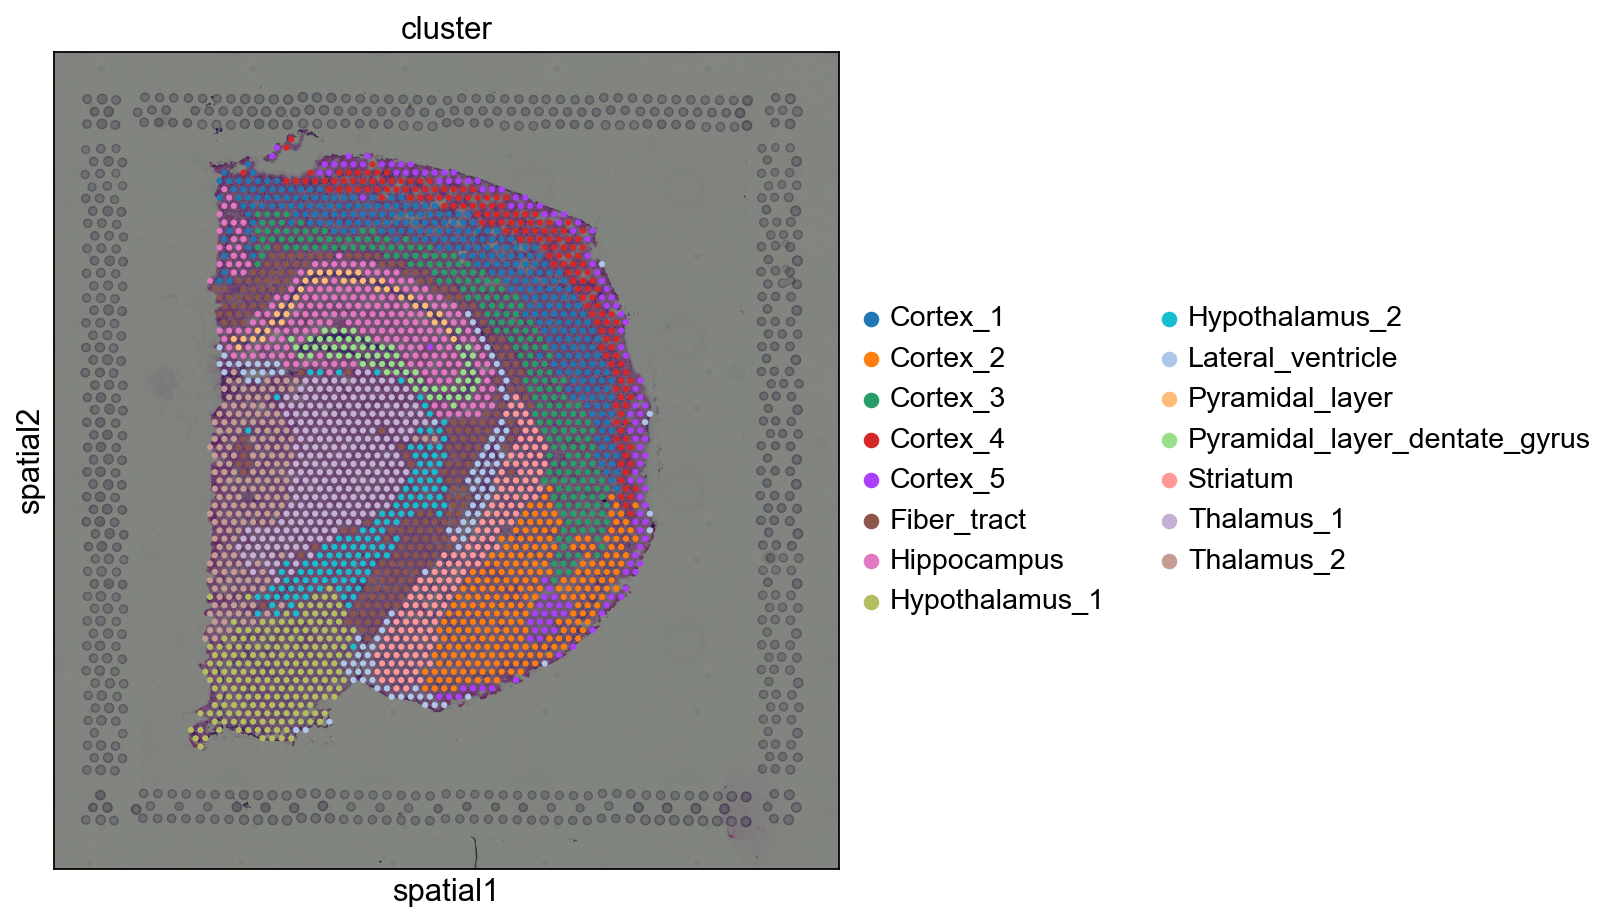

In [4]:
sq.pl.spatial_scatter(adata, color="cluster", figsize=(10, 10))

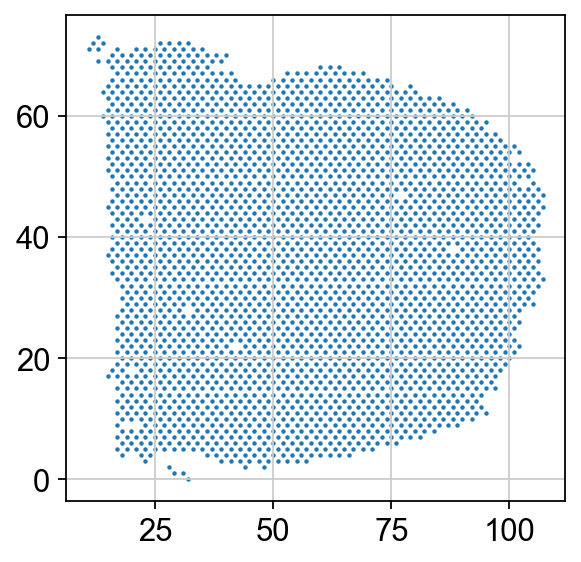

In [5]:
plt.scatter(
    adata.obs["array_col"],
    adata.obs["array_row"],
    s = 1
)

# Spatial domains in Squidpy

First off, we want an algorithm that encodes similarity between observations in some coordinate space, such as `gene expression space` and `spatial coordinates`. A nearest neighbor graph is a reliable representation for this task. Let’s compute the nearest neighbor graph in spatial coordinates and the nearest neighbor graph in PCA coordinates. 

As we can see based on adata.obsm['X_pca'] the PCA was already performed on the dataset, hence we can directly compute the KNN graph.

Spatial domain：在基因表达和组织学上具有空间一致性的区域

In [6]:
# nearest neighbor graph
sc.pp.neighbors(adata)
nn_graph_genes = adata.obsp["connectivities"]
# spatial proximity graph
sq.gr.spatial_neighbors(adata)
nn_graph_space = adata.obsp["spatial_connectivities"]

computing neighbors
    using 'X_pca' with n_pcs = 50


/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:07)
Creating graph using `grid` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)


In [7]:
alpha = 0.2

joint_graph = (1 - alpha) * nn_graph_genes + alpha * nn_graph_space  # alpha controls the weight of each graph
sc.tl.leiden(adata, adjacency=joint_graph, key_added="squidpy_domains")  # run Leiden clustering on the joint graph

running Leiden clustering
    finished: found 17 clusters and added
    'squidpy_domains', the cluster labels (adata.obs, categorical) (0:00:00)


In [8]:
adata.obs

in_tissue  array_row  array_col  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102               4928   
AAACAATCTACTAGCA-1          1          3         43               3448   
AAACACCAATAACTGC-1          1         59         19               6022   
AAACAGAGCGACTCCT-1          1         14         94               4311   
AAACCGGGTAGGTACC-1          1         42         28               5787   
...                       ...        ...        ...                ...   
TTGTTGTGTGTCAAGA-1          1         31         77               7016   
TTGTTTCACATCCAGG-1          1         58         42               6995   
TTGTTTCATTAGTCTA-1          1         60         30               5082   
TTGTTTCCATACAACT-1          1         45         27               5661   
TTGTTTGTGTAAATTC-1          1          7         51               5626   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 8.502891       19340.0            9.869983   
AAACAATCTACTAGCA-1                 8.145840       13750.0            9.528867   
AAACACCAATAACTGC-1                 8.703341       32710.0           10.395467   
AAACAGAGCGACTCCT-1                 8.369157       15909.0            9.674704   
AAACCGGGTAGGTACC-1                 8.663542       31856.0           10.369013   
...                                     ...           ...                 ...   
TTGTTGTGTGTCAAGA-1                 8.856091       34390.0           10.445550   
TTGTTTCACATCCAGG-1                 8.853094       44372.0           10.700386   
TTGTTTCATTAGTCTA-1                 8.533657       24432.0           10.103690   
TTGTTTCCATACAACT-1                 8.641532       27381.0           10.217641   
TTGTTTGTGTAAATTC-1                 8.635332       23846.0           10.079413   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   38.428128                    43.133402   
AAACAATCTACTAGCA-1                   50.516364                    55.141818   
AAACACCAATAACTGC-1                   40.483033                    47.071232   
AAACAGAGCGACTCCT-1                   40.957948                    45.810547   
AAACCGGGTAGGTACC-1                   40.287544                    45.887745   
...                                        ...                          ...   
TTGTTGTGTGTCAAGA-1                   30.994475                    37.758069   
TTGTTTCACATCCAGG-1                   33.284504                    40.203281   
TTGTTTCATTAGTCTA-1                   38.506876                    45.640963   
TTGTTTCCATACAACT-1                   36.886892                    42.441839   
TTGTTTGTGTAAATTC-1                   31.187621                    36.660237   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    49.214064                    60.449845   
AAACAATCTACTAGCA-1                    60.952727                    70.574545   
AAACACCAATAACTGC-1                    54.564353                    65.087129   
AAACAGAGCGACTCCT-1                    52.077440                    62.976931   
AAACCGGGTAGGTACC-1                    52.982170                    64.248493   
...                                         ...                          ...   
TTGTTGTGTGTCAAGA-1                    45.891247                    57.321896   
TTGTTTCACATCCAGG-1                    48.906968                    61.421617   
TTGTTTCATTAGTCTA-1                    53.675508                    65.307793   
TTGTTTCCATACAACT-1                    49.589131                    60.998503   
TTGTTTGTGTAAATTC-1                    44.284157                    56.915206   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  \
AAACAAGTATCTCCCA-1           3857.0               8.257904      19.943123   
AAACAATCTACTAGCA-1           3267.0               8.091933      23.760000   
AAACACCAATAACTGC-

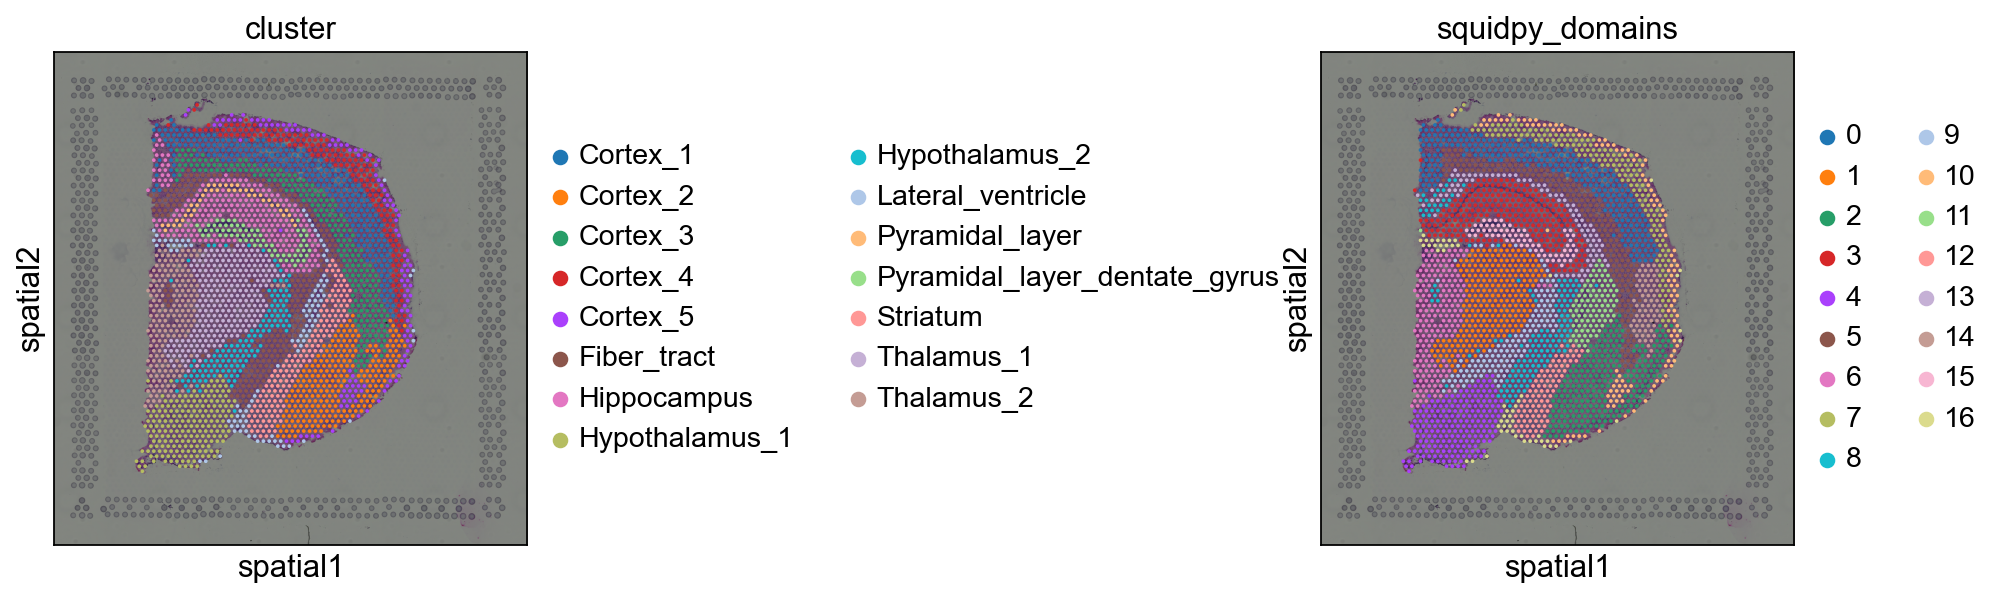

In [9]:
sq.pl.spatial_scatter(adata, color=["cluster", "squidpy_domains"], wspace=0.9)

We can see that such an approach is essentially “smoothing” the cluster annotations based on spatial distances. Despite it being a purely pedagogical approach, it has been used in practice. We invite the reader to check out more principled approaches.

# SpaGCN

SpaGCN combines gene expression, spatial information and the histological images in an undirected weighted graph. This graph represents the overall spatial dependencies present in the data, which can be used in a graph convolutional approach to identify spatial domains.

软件SpaGCN从其相邻spot聚合每个spot的基因表达，从而能够识别具有一致表达和组织学的空间域

识别相似的邻域来划分空间区域，基本是在替代普通的聚类，在空间域中寻找差异表达基因

In [2]:
import SpaGCN as spg

import numpy as np
from PIL import Image
import requests

In [11]:
# SpaGCN takes as additional input the hostological image of the spatial dataset.
# SpaGCN can also be used without histology information. We will refer to it at a later point.
img = np.asarray(
    Image.open(
        requests.get(
            "https://cf.10xgenomics.com/samples/spatial-exp/1.1.0/V1_Adult_Mouse_Brain/V1_Adult_Mouse_Brain_image.tif",
            stream=True,
        ).raw
    )
)

/home/mowp/mambaforge/envs/st/lib/python3.10/site-packages/PIL/Image.py:3167: DecompressionBombWarning: Image size (132748287 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


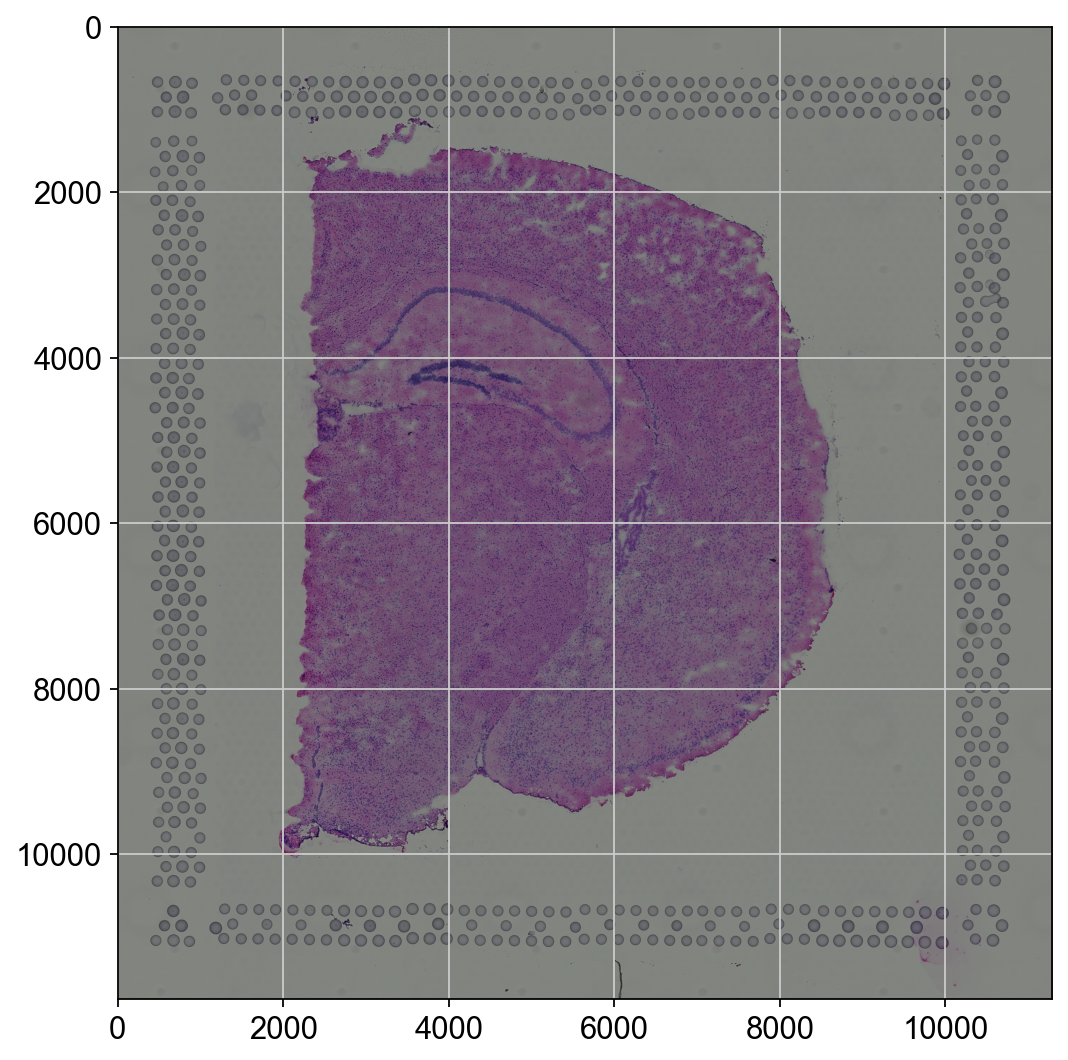

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(img)

In [13]:
# To ensure we are applying the correct data processing needed for SpaGCN, we are resetting adata.X to the raw counts.
adata.X = adata.raw.X

## Integrate gene expression and histology into a Graph

In [14]:
# SpaGCN requires passing the spatial array coordinates as well as the pixel coordinates to the model. 
# Set coordinates
x_array = adata.obs["array_row"].tolist()
y_array = adata.obs["array_col"].tolist()
x_pixel = (adata.obsm["spatial"][:, 0]).tolist()
y_pixel = adata.obsm["spatial"][:, 1].tolist()

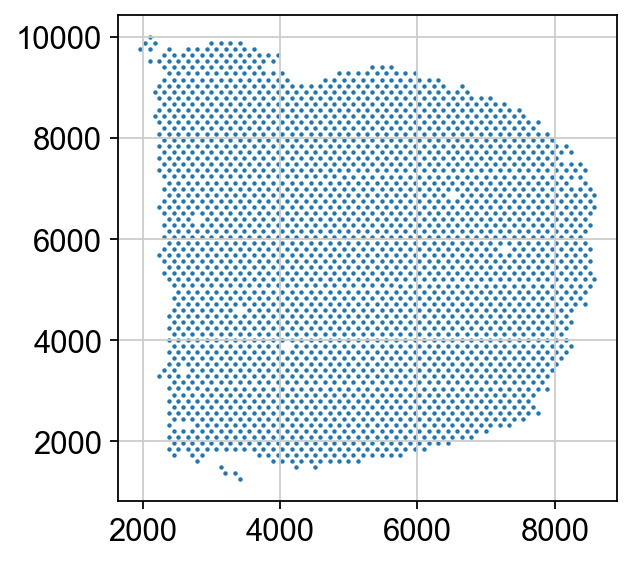

In [35]:
plt.scatter(
    x_pixel, y_pixel, s=1
)

In [15]:
# Calculate adjacent matrix
adj = spg.calculate_adj_matrix(
    x=x_pixel,
    y=y_pixel,
    x_pixel=x_pixel,
    y_pixel=y_pixel,
    image=img,
    beta=55,
    alpha=1,
    histology=True,
)

Calculateing adj matrix using histology image...
Var of c0,c1,c2 =  96.93674686223055 519.0133178897761 37.20274924909862
Var of x,y,z =  2928460.011122931 4665090.578837907 4665090.578837907


- `beta` determines the area of each spot when extracting the color intensity. This value can typically be obtained from `adata.uns['spatial']`. Typically, Visium spots have a size of 55 to 100 μm

- `alpha` determines the weight given to the histology image when calculating the Euclidean distance between spots. alpha=1 means the histology pixel intensity value has the same scale variance as the (x,y) coordinate.

In [37]:
adj.shape

(2688, 2688)

In [38]:
adj

array([[   0.    , 8894.177 , 8032.382 , ..., 7477.48  , 5543.6714,
        8186.683 ],
       [8894.177 ,    0.    , 6904.335 , ..., 6882.951 , 6299.303 ,
         772.252 ],
       [8032.382 , 6904.335 ,    0.    , ...,  769.9381, 4018.7317,
        6606.7695],
       ...,
       [7477.48  , 6882.951 ,  769.9381, ...,    0.    , 3972.9128,
        6509.206 ],
       [5543.6714, 6299.303 , 4018.7317, ..., 3972.9128,    0.    ,
        5901.5454],
       [8186.683 ,  772.252 , 6606.7695, ..., 6509.206 , 5901.5454,
           0.    ]], dtype=float32)

## Preprocessing of gene expression data

In [17]:
adata.var_names_make_unique()

sc.pp.filter_genes(adata, min_cells=3)

# find mitochondrial (MT) genes
adata.var["MT_gene"] = [gene.startswith("MT-") for gene in adata.var_names]
# remove MT genes (keeping their counts in the object)
adata.obsm["MT"] = adata[:, adata.var["MT_gene"].values].X.toarray()
adata = adata[:, ~adata.var["MT_gene"].values].copy()

# Normalize and take log for UMI
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


##  Hyperparameters of SpaGCN

In [18]:
p = 0.5
# Find the l value given p
l = spg.search_l(p, adj)

# 设置超参数
# p：社区贡献的总表达百分比。
# l：控制p的参数。

# For Visium data, SpaGCN recommends p=0.5. 
# For data with smaller capture areas like Slide-seq V2 or MERFISH, it is recommended to choose a higher contribution value.

Run 1: l [0.01, 1000], p [0.0, 176.04695830342547]
Run 2: l [0.01, 500.005], p [0.0, 38.50406265258789]
Run 3: l [0.01, 250.0075], p [0.0, 7.22906494140625]
Run 4: l [0.01, 125.00874999999999], p [0.0, 1.119886875152588]
Run 5: l [62.509375, 125.00874999999999], p [0.07394278049468994, 1.119886875152588]
Run 6: l [93.7590625, 125.00874999999999], p [0.4443991184234619, 1.119886875152588]
Run 7: l [93.7590625, 109.38390625], p [0.4443991184234619, 0.7433689832687378]
Run 8: l [93.7590625, 101.571484375], p [0.4443991184234619, 0.5843360424041748]
Run 9: l [93.7590625, 97.66527343749999], p [0.4443991184234619, 0.5119975805282593]
Run 10: l [95.71216796875, 97.66527343749999], p [0.47760796546936035, 0.5119975805282593]
recommended l =  96.688720703125


In [20]:
l

96.688720703125

If the number of spatial domains in the tissue is known, SpaGCN can calculate a suitable resolution to generate the respective number. This might be for example the case in brain samples, where one wants to find a certain number of cortex layers in the spatial slide. If the number of domains is not known, SpaGCN varies the resolution parameter from 0.2 to 0.1 and uses a resolution that results in the highest Silhouette score.

In [19]:
# Search for suitable resolution
res = spg.search_res(adata, adj, l, target_num=15)

Start at res =  0.4 step =  0.1
Initializing cluster centers with louvain, resolution =  0.4
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
Epoch  0
Res =  0.4 Num of clusters =  10
Initializing cluster centers with louvain, resolution =  0.5
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, cat

In [21]:
res

0.65

In [22]:
model = spg.SpaGCN()
model.set_l(l)

In [23]:
model.train(adata, adj, res=res)

Initializing cluster centers with louvain, resolution =  0.65
computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
Epoch  0
Epoch  10
Epoch  20
Epoch  30
Epoch  40
Epoch  50
Epoch  60
Epoch  70
delta_label  0.000744047619047619 < tol  0.001
Reach tolerance threshold. Stopping training.
Total epoch: 79


In [24]:
y_pred, prob = model.predict()

In [25]:
adata.obs["spaGCN_domains"] = y_pred
adata.obs["spaGCN_domains"] = adata.obs["spaGCN_domains"].astype("category")

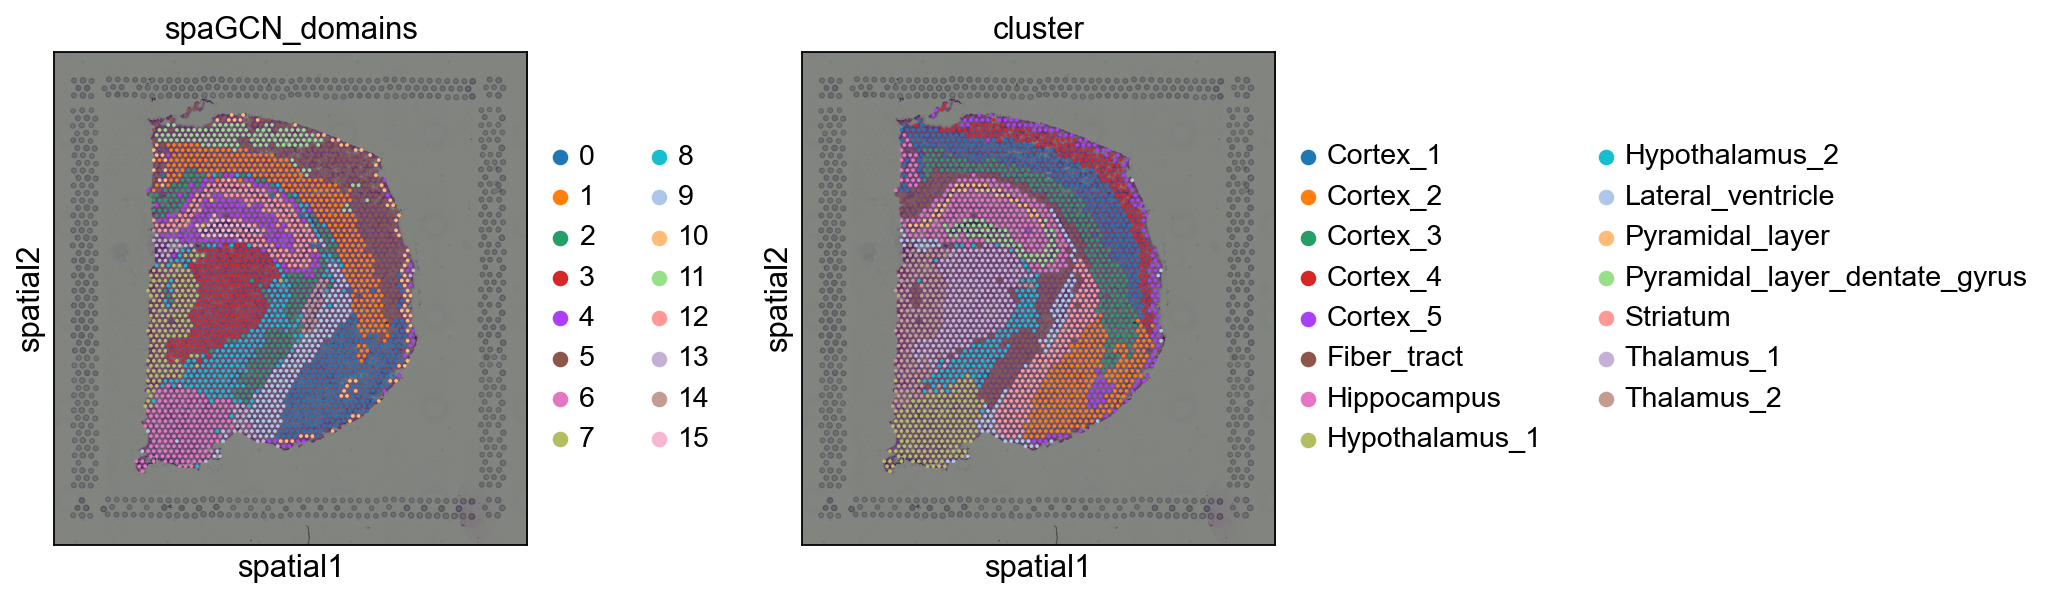

In [29]:
sq.pl.spatial_scatter(adata, color=["spaGCN_domains", "cluster"], wspace=0.3)

## Refining the detected spatial domains 

SpaGCN includes an optional refinement step to enhance the clustering result which inspects the domain assignment of each sput and its neighboring spots. In cases where more than half of the neighboring spots have been assigned to a different domain, the spot will be relabeled to the main domain of its neighboring spots. The refinement step will only impact a few spots. **Generally, SpaGCN only recommends the refinement when the dataset is expected to have clear domain boundaries.**

In [30]:
# For the refinement, SpaGCN first calculated an adjacency matrix without accounting for the histological image.
adj_2d = spg.calculate_adj_matrix(x=x_array, y=y_array, histology=False)

Calculateing adj matrix using xy only...


In [31]:
refined_pred = spg.refine(
    sample_id=adata.obs.index.tolist(),
    pred=adata.obs["spaGCN_domains"].tolist(),
    dis=adj_2d,
)

In [32]:
adata.obs["refined_spaGCN_domains"] = refined_pred
adata.obs["refined_spaGCN_domains"] = adata.obs["refined_spaGCN_domains"].astype(
    "category"
)

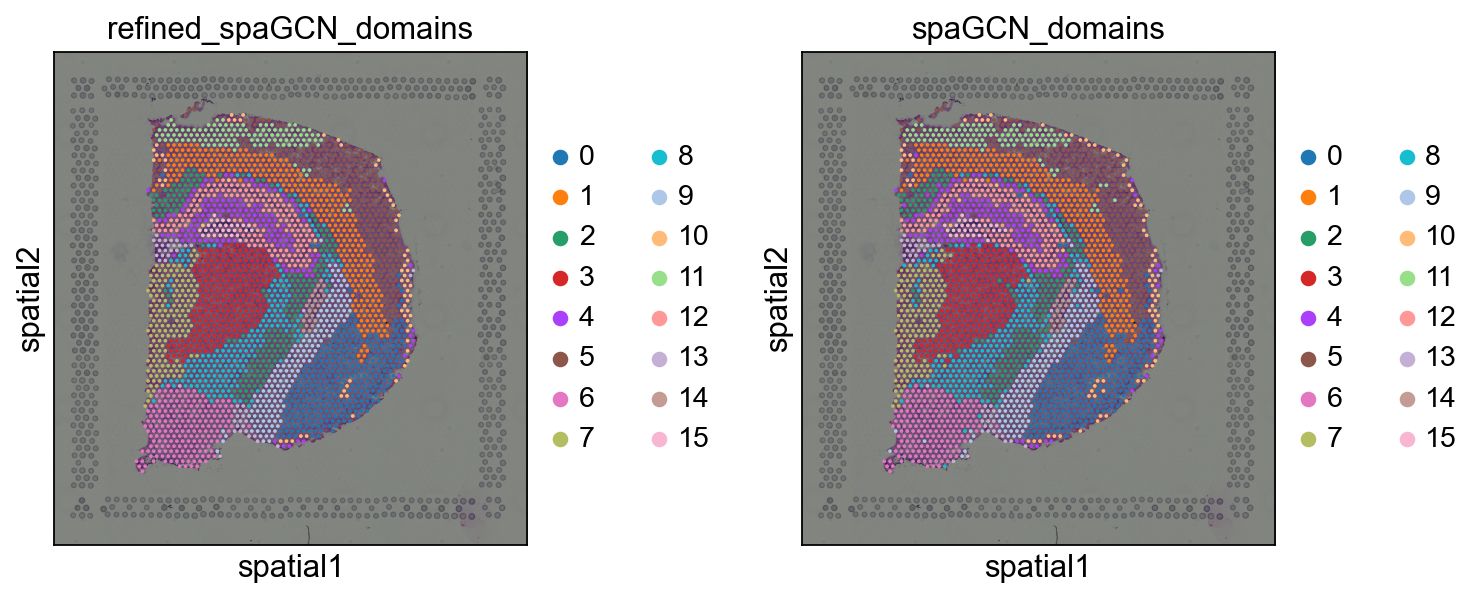

In [41]:
sq.pl.spatial_scatter(adata, color=["refined_spaGCN_domains", "spaGCN_domains"], wspace=0.3)

In [3]:
import session_info

session_info.show()